In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

# Read the CSV and Perform Basic Data Cleaning

In [4]:
# Cleaning, encoding and scaling already performed in 'ML_preprocessing.ipynb'
# Load data
file_path = Path("sonoma_shelter_ML_testing.csv")
df = pd.read_csv(file_path)
df.head()

,Animal Type_CAT,Animal Type_DOG,Sex_Female,Sex_Male,Sex_Neutered,Sex_Spayed,Sex_Unknown,Size_KITTN,Size_LARGE,Size_MED,...,Intake Jurisdiction_*SEBASTOPOL,Intake Jurisdiction_*SONOMA,Intake Jurisdiction_*TRIBAL RESV,Intake Jurisdiction_*WINDSOR,Intake Jurisdiction_COUNTY,Intake Jurisdiction_OUT OF COUNTY,Intake Jurisdiction_SANTA ROSA,Intake Jurisdiction_UNKNOWN,Days in Shelter_y,Age at Intake_y
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.08,-0.099075
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.32,1.100567
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.24,-0.316920
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.36,-0.222620
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.40,-0.153387


# Split the Data into Training and Testing

In [5]:
# Define features set
X = df.copy()
X = X.drop('Outcome Type_ADOPTION RETURN', axis=1)
X.head()
# Create our target
y = df['Outcome Type_ADOPTION RETURN']

In [6]:
X.describe()

,Animal Type_CAT,Animal Type_DOG,Sex_Female,Sex_Male,Sex_Neutered,Sex_Spayed,Sex_Unknown,Size_KITTN,Size_LARGE,Size_MED,...,Intake Jurisdiction_*SEBASTOPOL,Intake Jurisdiction_*SONOMA,Intake Jurisdiction_*TRIBAL RESV,Intake Jurisdiction_*WINDSOR,Intake Jurisdiction_COUNTY,Intake Jurisdiction_OUT OF COUNTY,Intake Jurisdiction_SANTA ROSA,Intake Jurisdiction_UNKNOWN,Days in Shelter_y,Age at Intake_y
count,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,...,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000
mean,0.371793,0.628207,0.095998,0.120397,0.408277,0.363927,0.011401,0.188690,0.173526,0.193593,...,0.000798,0.001140,0.000798,0.060084,0.429370,0.009235,0.489226,0.000228,0.364574,0.299047
std,0.483311,0.483311,0.294606,0.325443,0.491543,0.481155,0.106172,0.391284,0.378723,0.395136,...,0.028241,0.033748,0.028241,0.237657,0.495014,0.095659,0.499912,0.015100,1.512742,0.834263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.520000,-0.424948
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.400000,-0.335721
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.600000,0.664279
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.080000,3.934348


In [7]:
# Check the balance of our target values
# Class imbalance to be addressed in specific section below
y.value_counts()

1.0    6388
0.0    2383
Name: Outcome Type_ADOPTION RETURN, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train.shape

(6578, 40)

### Gradien Boosting Regressor

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    regressor = GradientBoostingRegressor(n_estimators=100,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            criterion = 'mse',
                                            random_state=0)
    # Fit the model
    regressor.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        regressor.score(
            X_train,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        regressor.score(
            X_test,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.330
Accuracy score (validation): 0.326

Learning rate:  0.1
Accuracy score (training): 0.362
Accuracy score (validation): 0.351

Learning rate:  0.25
Accuracy score (training): 0.396
Accuracy score (validation): 0.360

Learning rate:  0.5
Accuracy score (training): 0.423
Accuracy score (validation): 0.359

Learning rate:  0.75
Accuracy score (training): 0.434
Accuracy score (validation): 0.338

Learning rate:  1
Accuracy score (training): 0.451
Accuracy score (validation): 0.306



In [41]:
# Choose a learning rate and create regessor
regressor_params = {'n_estimators': 20,
                    'learning_rate': 0.5,
                    'max_features': 5,
                    'max_depth': 3,
                    'criterion': 'mse',
                    'random_state': 0}

regressor = GradientBoostingRegressor(**regressor_params)
# Fit the model
regressor.fit(X_train, y_train)
# Make Prediction
predictions = regressor.predict(X_test)
predictions

array([0.82280831, 0.75725397, 0.8794321 , ..., 0.36236475, 0.86358256,
       0.89444088])

In [32]:
# Print Coefficient of determination R2
print("Model Accuracy: %.3f" % regressor.score(X_test, y_test))

Model Accuracy: 0.312


In [33]:
# Print the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, regressor.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.1362


In [51]:
# Sort the features by their importance
features_imp_df = pd.DataFrame(sorted(zip(regressor.feature_importances_, X.columns), reverse=True))
features_imp_df.columns = ['%', 'Feature']
features_imp_df.head(10)

,%,Feature
0,0.316953,Intake Condition_UNTREATABLE
1,0.140086,Sex_Female
2,0.129074,Sex_Male
3,0.101864,Intake Condition_HEALTHY
4,0.061803,Sex_Unknown
5,0.034400,Sex_Spayed
6,0.031190,Intake Type_OWNER SURRENDER
7,0.028297,Intake Condition_TREATABLE/MANAGEABLE
8,0.021602,Sex_Neutered
9,0.019911,Intake Condition_UNKNOWN


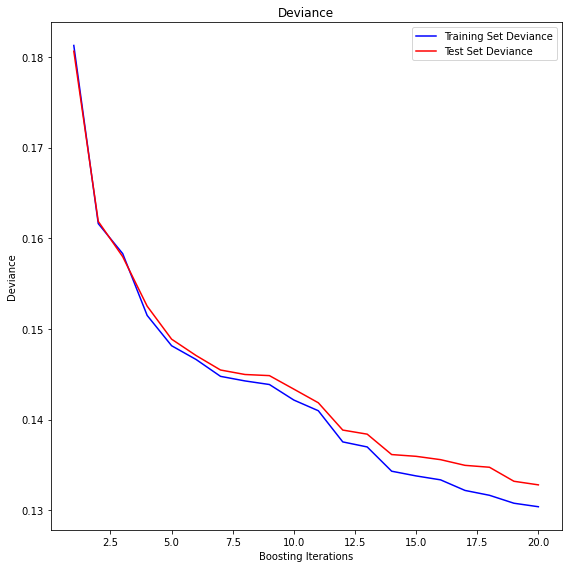

In [52]:
# Assessing the training and test deviance (loss)
test_score = np.zeros((regressor_params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(regressor.staged_predict(X_test)):
    test_score[i] = regressor.loss_(y_test, y_pred)
 
fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(regressor_params['n_estimators']) + 1, regressor.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(regressor_params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()